In [2]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Linear Regression</center></h1>

<b>Linear Regression</b> is a useful tool for predicting a quantitative response.

### 3.1 Simple Linear Regression

<b>Simple linear regression</b> is a straightforward approach for predicting a <b>quantitative response</b> on the basis of a single predictor variable. Mathematically it can be written as:

$$Y \approx \beta_0 + \beta_1 X$$

$\beta_0$ and $\beta_1$ represent intercept and slope and are called as <b>model coefficients or parameters.</b> The estimated equation is given as:

$$\widehat{y} \approx \widehat{\beta_0} + \widehat{\beta_1} x$$

where hat symbol is used to denote the estimated values.

#### 3.1.1 Estimating the Coefficients 

The goal of linear regression is to find the estimate and slope such that the line is as close as possible to the data points. There are a number of ways of measuring <b>closeness</b>. The most common approach involves minimizing the <b>least square</b> criterion.

Let $\widehat{y_i} \approx \widehat{\beta_0} + \widehat{\beta_1} x_i$ be the prediction for $i$th value of X, then $e_i = y_i - \widehat{y_i}$ represents the <b>$i$th residual</b>. We define the <b>residual sum of squares(RSS)</b> as:

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$

The least square method chooses the coefficient to minimize RSS and are given as:

$$\widehat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = 
\frac{Cov(X, Y)}{Var(X)}$$

$$\beta_0 = \bar{y} - \widehat{\beta_1}\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the sample means. Below figure shows the simple regression and residual plot for advertisement data (sales vs TV).

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


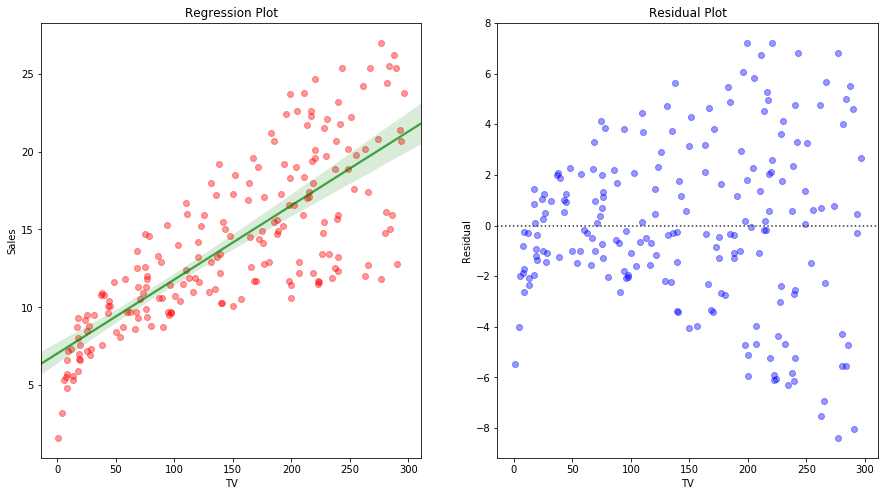

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adv = pd.read_csv("data/Advertising.csv")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x="TV", y="Sales", color='r', fit_reg=True, data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x="TV", y="Sales", color='blue', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')

plt.show()

#### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

True relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$, where $\epsilon$ is a <b>mean-zero random error term.</b> For the estimation of $f$ from a linear function, the relationship can be written as:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

The model given by above equation represents <b>population regression line</b>, which is the best linear approximation to the true relationship between $X$ and $Y$. The <b>least square regression line</b> estimates the population regression line. Concept of these two lines is a natural extension of the standard statistical approach of using information from a sample to estimate characteristics of a large population.

If we use averaged sample mean (average over a large set of samples) to estimate population mean, the estimation is <b>unbiased</b>. Similary if we average the estimates of the model coefficients over a huge number of data sets, then it will somewhat be an accurate estimation of population regression line.

<b>Standard error</b> in the estimation of population mean from the sample mean (when a single data set is used for estimation) is given as:

$$Var(\widehat{\mu}) = SE(\widehat{\mu})^2 = \frac{\sigma^2}{n}$$

If we use a single data set to estimate $\beta_0$ and $\beta_1$, the <b>standard errors</b> associated with them is given as:

$$SE(\beta_0)^2 = \sigma^2 \Big[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \Big]$$

$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

where $\sigma^2 = Var(\epsilon)$. From the formula, it can be observed that <b>error in slope is smaller if $x_i$s are more spread out.</b> We can also see that $SE(\widehat{\beta_0})$ will be equal to $SE(\widehat{\mu})$ if $\bar{x} = 0$.

Standard errors can be used to compute <b>confidence intervals</b>. For linear regression, the 95% confidence interval takes the form:

$$\widehat{\beta_i} \pm 2SE(\widehat{\beta_i})$$

Standard errors can also be used to perform <b>hypothesis tests</b>. For linear regression, the hypothesis test can be defined as:

 - $H_0$: There is no relationship between X and Y ($\beta_1 = 0$)
 - $H_a$: There is some relatioship between X and Y ($\beta_1 \neq 0$)
 
To test the null hypothesis $H_0$, we need to determine that whether $\widehat{\beta_1}$ is sufficiently far from 0. In practice, it can be determined by <b>t-statistic</b> which measures the number of standard deviations it is away from 0 and is given as:

$$t = \frac{\widehat{\beta_1} - 0}{SE(\beta_1)}$$

If there is no relationship between $X$ and $Y$, we expect that above equation will have a t-distribution with $n-2$ degrees of freedom. For large values of n(>30), it is quite similar to normal distribution. The <b>p-value</b> measures the strength of the relationship. <b>If p-value is small, we can reject the null hypothesis</b> and can say that there is significant relationship between $X$ and $Y$.

#### 3.1.3 Assessing the Accuracy of the Model

The quality of linear regression fit is assessed using: the <b>residual standard error (RSE)</b> and the <b>$R^2$ statistic</b>.

<b>Residual Standard Error</b> is an estimate of the standard deviation of $\epsilon$. It is the average amount that the response will deviate from the true regression line. It is computed as (where <b>RSS</b> is residual sum of squares):

$$RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n}(y_i - \widehat{y_i})^2} = \sqrt{\frac{1}{n-2} RSS}$$

How much value of RSE is acceptable depends on the context.

<b>R$^2$ statistic</b> takes the form of proportion and takes value between 0 and 1 and hence is independent of the scale of $Y$. It is given as:

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where $TSS = \sum_{i=1}^{n}(y_i - \bar{y})$ is the <b>total sum of squares</b> or it can be termed as total variance in Y. For the interpretation, TSS can be interpreted as total variance in response Y before the regression is performed and RSS is the amount of variability that is left unexplained. Hence, $TSS-RSS$ is the amount of variability explained by the model. Hence, a <b>higher value of R$^2$ statistic (closer to 1) represents better fit.</b>

<b>Correlation coefficient</b>, which is defined as:

$$Cor(X, Y) = \frac{Cov(x, Y)}{\sigma_x \sigma_Y} = 
\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

also measures linear relationship between two varibles $X$ and $Y$. It can be shown that the <b>the squared correlation coefficient</b>, $r^2 = R^2$ for linear regression, where $r^2 = Cor(X, Y)$.

### 3.2 Multiple Linear Regression

In general, suppose we have $p$ distinct predictors, the multiple linear regression takes the form:

$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon$$

where $\beta_j$ can be interpreted as the average effect on $Y$ of a one unit increase in $X_j$, <b>holding all other predictors fixed.</b>

#### 3.2.1 Estimating the Regression Coefficients

Given the estimates, $\widehat{\beta_0}, \widehat{\beta_1},..., \widehat{\beta_p}$, predictions can be done as:

$$\widehat{y} = \widehat{\beta_0} + \widehat{\beta_1}x_1 + \widehat{\beta_2}x_2 + ... + \widehat{\beta_p}x_p$$

$\beta$s can be estimated by minimizing the sum of squared residuals:

$$RSS = \sum_{i=1}^{n}(y_i - \widehat{y_i})^2 = \sum_{i=1}^{n}(y_i - \widehat{\beta_0} + \widehat{\beta_1}x_{i1} + \widehat{\beta_2}x_{i2} + ... + \widehat{\beta_p}x_{ip})^2$$

The model coefficients for multiple linear regression for advertisement data is calculated below. It is observed that the coefficient for newspaper is almost equal to 0. As we analyze the correlation table for the data, the correlation coefficient between radio and newspaper is 0.35 and hence the rise in sales due to newspaper may arise due to the radio advertising, though if we fit a model for sales and newspaper the coefficient will not be 0.

In [29]:
from sklearn import linear_model

reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit (adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])
print("Model Coefficients: " + str(reg.coef_))
print("Intercept: " + str(reg.intercept_))
print("R-statistics: " + str(reg.score(adv[['TV', 'Radio', 'Newspaper']], adv['Sales'])))

Model Coefficients: [ 0.04576465  0.18853002 -0.00103749]
Intercept: 2.9388893694594085
R-statistics: 0.8972106381789521


In [30]:
print("Correlation Coefficients:")
adv[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

Correlation Coefficients:


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


#### Is There a Relationship Between the Response and Predictors?

To check whether there is a relationship between response and predictors, we need to check whether $\beta_1 = \beta_2 = ... = \beta_p = 0$. The hypothesis is as follows:

 - $H_0$: $\beta_1 = \beta_2 = ... = \beta_p = 0$
 - $H_A$: at least one of $\beta_j$ is non-zero.
 
The hypothesis test is performed by computing the <b>F-statistic</b>:

$$F = \frac{(TSS-RSS) \ / \ p}{RSS \ / \ (n-p-1)}$$

where TSS is <b>total sum of squares</b> and RSS is <b>residual sum of squares</b>. If linear model assumption is true the denominator equals $\sigma^2$. If the <b>null hypothesis is true</b>, the numerator equals $\sigma^2$ as well and hence value of <b>F-statistic equals 1</b>. If the alternate hypothesis is true <b>F is greater than 1.</b> How large does the F-statistic have to be to reject $H_0$? For large value of $n$, F-statistic that is little larger than $n$ provides the evidence against $H_0$. A large F-statistic is needed to reject $H_0$ if n is small. When $H_0$ is true and the errors $\epsilon_i$ have a normal distribution, F-statistics follows an <b>F-distribution</b> and hence <b>p-value</b> can be calculated from that.

Sometimes we want to test that whether a particular set of predictors have a relationship with response. This corresponds to null hypothesis:

 - $H_0$: $\beta_{p-q+1} = \beta_{p-q+2} = ... = \beta_{p} = 0$
 
In this case we can fit a model that uses all the variables except these last $q$. Suppose the residual sum of squares for this model is $RSS_0$, then the F-statistic is defined as:

$$F = \frac{(RSS_0 - RSS)\ / \ q }{RSS\ /\ (n-p-1)}$$

For <b>very large number of variables</b> (p > n), we can not fit the multiple linear regression and F-statistic can not be used as well.

#### Deciding on Important Variables

The task of determining which predictors are associated with the response, in order to fit a single model involving only those predictors, is referred to as <b>variable selection.</b> One approach is to use all the possible combinations of predictors, build the model and select the one which fits best. But for large value of p, this approach is not feasible. There are three calssic approaches for this:

 - <b>Forward Selection:</b> We begin with a <b>null model</b> (only with intercept) and fit $p$ linear regressions and add to the null model the variable that results in the <b>lowest RSS</b>. Then we can add to the model (with one variable) the variable that contributes lowest RSS for the new two-variable model. This process is continued until some stopping criteria is satisfied.
 
 
 - <b>Backward Selection:</b> This works in the same way but in the reverse order. We start with a p-variable model and remove the variable with <b>largest p-value</b> resulting in a (p-1)-variable model. We can continue further until all remaining variables have a p-value below some threshold.
 
 
 - <b>Mixed Selection:</b> This is a combination of forward and backward selection.
 
Backward selection can not be used if $p > n$, but forward selection can always be used.

#### Model Fit 

Two most common numerical measure that can be used to describe the model fit are <b>RSE</b> and <b>R</b>^2. These quantities can be interpreted in the same way for multiple linear regression with one difference. For simple linear regression, $R^2$ is equal to the square of the correlation between response and the predictor. In the case of multiple linear regression, it equals $Cor(Y, \widehat{Y})^2$ instead. <b>$R^2$ will always increase if more variables are added to the model, even if those variables are weakly associated with the response.</b> Analysing the plot of the data is also a good way to check the model fit.

#### Predictions

We can use the least square plane to make the prediction for the response variable but there are some uncertainty associated with the prediction:

 - The model coefficients are only an estimation of the true population regression plane.
 
 - In practice, assuming a linear model for $f(X)$ is an approximation and hence there is an additional reducible error which was called as <b>model bias.</b>
 
 - Even if $f(X)$ is known, there are some irreducible errors due to $\epsilon$, which can not be predicted.

### 3.3 Other Considerations in the Regression Model

#### 3.3.1 Qualitative Predictors 

There can be a case when predictor variables can be <b>qualitative.</b>

#### Predictors with Only Two Levels

For the predictors with only two values, we can create an <b>indicator</b> or <b>dummy variable</b> with values 0 and 1 and use it in the regression model. The final prediction will not depend on the coding scheme. Only difference will be in the model coefficients and the way they are interpreted. 

#### Qualitative Predictors with More than Two Levels

When a qualitative predictor has more than two levels, we can use more than one single dummy variable to encode them. There will always be one less dummy variable than the number of levels.

#### 3.3.2 Extensions of the Linear Model

Standard linear regression provides results that work quite well on real world problems. However, it makes two restrictive assumptions:

 - <b>Additive:</b> Relationship between response and predictor is additive, which means that the effect of change in the predictor $X_i$ on the response $Y$ is independent of the values of other predictors.
 
 
 - <b>Linear:</b> Change in response $Y$ due to one unit change in $X_j$ is constant.

#### Removing the Additive Assumption

A <b>synergy</b> or an <b>interaction</b> effect is described as the phenomenon when two predictors can interact while deciding on response. Linear model can be extended and take into account an <b>interaction term</b>($X_1X_2$) as follows:

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$

There may be a case when interaction term has a very small p-value but the associated main effects do not. The <b>hierarchial principal</b> states that if we include the interaction term in the model, we should also include the main effect, even if the associated p-values are not significant.

Interaction effect of qualitative with quantitative variables can be incorporated in the same way.

#### Non-linear Relationships 

<b>Polynomial Regression</b> can be used to extend the linear model to accomodate the non-linear relationship. The various regression models for miles per gallon vs horsepower for auto data is shown below. A simple way to incorporate non-linear associations in a linear model is by adding transformed versions of the predictors as follows (order 2):

$$mpg = \beta_0 + \beta_1 \times horsepower + \beta_2 \times horsepower^2 + \epsilon $$

This approach is called as <b>polynomial regression.</b>

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


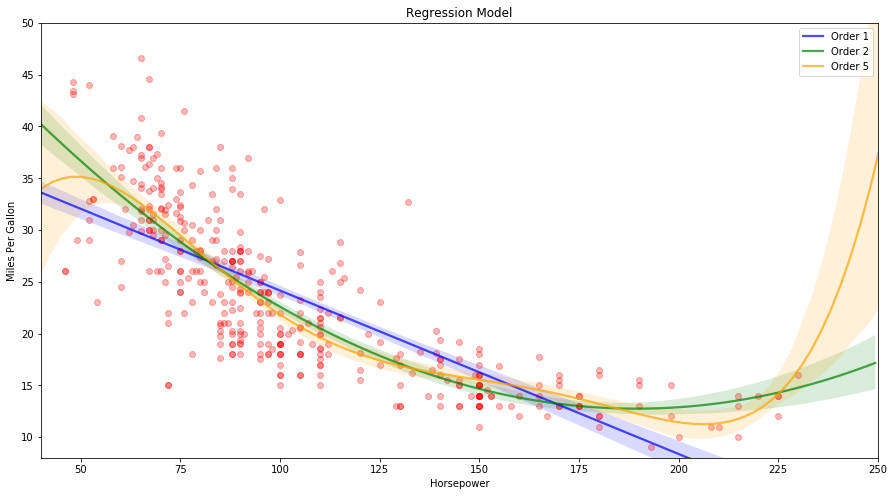

In [58]:
auto = pd.read_csv("data/Auto.csv")
auto.dropna(inplace=True)
auto = auto[auto['horsepower'] != '?']
auto['horsepower'] = auto['horsepower'].astype(int)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=1, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'blue', 'alpha':0.7, 'label':'Order 1'})
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=2, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'g', 'alpha':0.7, 'label':'Order 2'})
sns.regplot(x="horsepower", y="mpg", color='r', fit_reg=True, data=auto, order=5, scatter_kws={'alpha':0.1}, 
            line_kws={'color':'orange', 'alpha':0.7, 'label':'Order 5'})

ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles Per Gallon')
ax.set_title('Regression Model')
ax.set_ylim(8, 50)
ax.set_xlim(40, 250)
ax.legend()

plt.show()

#### 3.3.3 Potential Problems

The problems which arise when we fit a linear regression to a particular data set are as follows:

 - <b>Non-linearity of the Data:</b> 

    <b>Residual plots</b> are a useful graphical tool for identifying non-linearity. For simple linear regression, a plot of residual vd predictor can be analyzed. In the case of multiple linear regression, as there are multiple predictors, a plot of residuals vs predicted values can be analyzed. Ideally, the residual plot will show no discernible pattern. The presence of a pattern may indicate a problem with some aspect of the linear model. If the residual plots indicate that there is a non-linear associations in the data, non-linear transformation of the predictors can be used in the model.


 - <b>Correlation of Error Terms:</b>

    An important assumption of linear regression model is that the error terms are uncorrelated. If there is a correlation between the error terms, the estimated standard errors will tend to underestimate the true standard errors. As a result, the confidence and prediction intervals will be narrower and the p-value associated with the model will be lower which results in an <b>unwarranted sense of confidence in the model.</b>d
    
    Correlation in error terms might occur in the context of <b>time series</b> data. This can be visualized by plotting the residuals against time and checking for a discernable pattern.
    
    
 - <b>Non-constant Variance of Error Terms:</b>
 
     Another assumption of the linear regression model is that the error terms have a constant variance. The non-constant variances in the errors can be identified by the presence of a <b>funnel shape</b> in the residual plot. When faced with this problem one possible approach is to transform the response $Y$ using a concave function $logY$ or $\sqrt Y$.
     
     
 - <b>Outliers:</b>
 
     An outlier may have a little effect on the least square fit but it can cause other problems like high value of RSE and lower R$^2$ values which can affect the interpretation of the model. <b>Residual plots</b> can be used to identify outliers.
     
     
 - <b>High Leverage Points:</b>
 
     High leverage points have an unsual values for $x_i$. Removing high leverage point has more substantial impact on the least square line compared to the outliers. Hence it is important to identify high leverage points. In a simple linear regression, it is easy to check on the range of the predictors and find the high levarage points. For a multiple linear regression, the predictors may lie in their individual ranges but can lie outside in terms of the full set of predictors. <b>Leverage statistic</b> is a way to identify the high leverage points. A large value of this statistic indicates high leverage.
     
     
 - <b>Collinearity:</b>
 
     When two or more predictor variables are closely related to each other, a situation of collinearity arises. Due to collinearity, it can be impossible to separate out the individual effects of collinear variables on the response. Collinearity also reduces the estimation accuracy of the regression coefficients. As <b>t-statistic</b> of a predictor is calculated by dividing $\beta_i$ by its standard error, and hence collinearity results in the decline of t-statistic and consequently we may <b>fail to reject the null hypothesis.</b> 
     
     A simple approach is to detect collinearity is by analyzing the <b>correlation matrix</b>. This process has a drawback as it can not detect <b>multicollinearity</b> (collinearity between three or more variables). A better way to assess multicollinearity is by computing <b>variance inflation factor (VIF)</b>. VIF is the ratio of variance in a model with multiple predictors, divided by the variance of a model with one predictor alone. Smallest possible value of VIF is 1 and as a rule of thumb, a VIF value that exceeds 5 or 10 indicates a problematic amount of collinearity.
     
     There are two approaches to deal with the problem of collinearity. One is to simply drop one of the problematic variable. Alternatively we can combine the collinear variables together as a single predictor.